### Steps 2 - 4.  Conduct an initial analysis of the data, create a subset for the study, create copies for downstream processes

#### Import required libraries and load the CSV files created in Step 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
submissions = pd.read_csv('tfcc_submissions.csv')
comments = pd.read_csv('tfcc_comments.csv')


#### Display the first and last five rows and row counts for both dataframes

In [3]:
submissions

,id,title,selftext,author,score,num_comments,created_date
0,yc4bm,"No brain, No pain.",I swear that convergys will hire any moron tha...,[deleted],28,10,2012-08-16 19:38:03
1,yamv8,"""how fast does your modems go ?",Starting off the awesome Subreddit\n\nI used t...,[deleted],34,4,2012-08-16 01:24:57
2,ydntm,"[I can't tell you] information line, this is P...",Yay! 28th subscriber!\n\nI used to work for a...,PoglaTheGrate,29,4,2012-08-17 15:02:53
3,yicc4,Dishwasher blues,The stories i've heard amazes me but this one ...,[deleted],31,15,2012-08-20 05:05:34
4,ymjc0,"Tech support agent, and yet I can't touch my c...",At my work we are not allowed to adjust the mo...,hanzors,40,19,2012-08-22 06:27:29
...,...,...,...,...,...,...,...
10125,zxk7w2,"""Are you a camel jockey?"" Oh dear God",I just had a call that absolutely takes the ca...,CZJayG,277,41,2022-12-28 20:35:49
10126,zxn7bt,Call Totals Giving me Anxiety,Does anyone else have to make a certain amount...,BatBitch1016,45,7,2022-12-28 22:31:50
10127,zz7684,"kudos to you guys, I don't know how you do it.","I worked in retail for 7 years, recently took ...",Fact0ry0fSadness,211,54,2022-12-30 18:07:48
10128,zz8ztg,When will they learn?,(Work emergency roadside assistance as a dispa...,HogwartsAlumni25,30,11,2022-12-30 19:22:58


In [5]:
comments

,parent_id,body,score
0,t3_yc807,I'm not too familiar with mortgages but i thin...,8.0
1,t3_yc807,While I have no problem in the identification ...,4.0
2,t1_c5x5hyx,I never understood why we make people type in ...,3.0
3,t3_ymjc0,"this makes me like my call center, everything ...",3.0
4,t3_yc4bm,My boyfriend &amp; a few of our friends have w...,4.0
...,...,...,...
76843,t1_j2cqjfx,Or when theyve paid their bill late and we hav...,3.0
76844,t1_j2en3sz,I feel that. I love when claimants want a rent...,2.0
76845,t3_zzqwd8,"When I worked front desk for a hotel, someone ...",26.0
76846,t1_j2dej3k,I've done that but not to avoid calls. It was ...,7.0


### Drop any NaN (null) values in selftext and convert the values to string (in case some values aren't strings)

In [6]:
submissions['selftext'] = submissions['selftext'].astype(str)
submissions['selftext'].dropna(inplace=True)


### Plot the number of submissions per year

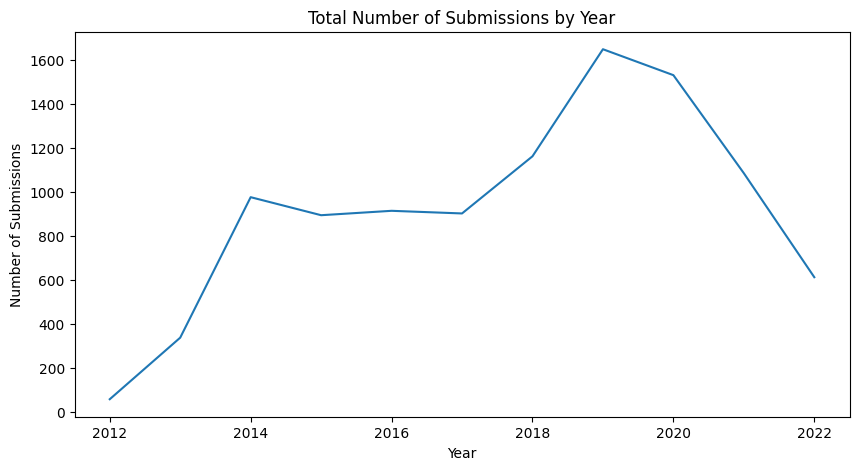

In [7]:
# Convert the "date" column to a pandas datetime object
submissions["created_date"] = pd.to_datetime(submissions["created_date"])

## Group the dataframe by year and count the rows in each year group
year_counts = submissions.groupby(submissions["created_date"].dt.year).size()

# Create a line plot of the year_counts series
year_counts.plot(kind="line", figsize=(10, 5))

# Set plot title and axis labels
plt.title("Total Number of Submissions by Year")
plt.xlabel("Year")
plt.ylabel("Number of Submissions")

# Show the plot
plt.show()

### Show the relationship between length of submission (self_text) and score (up votes minus down votes)

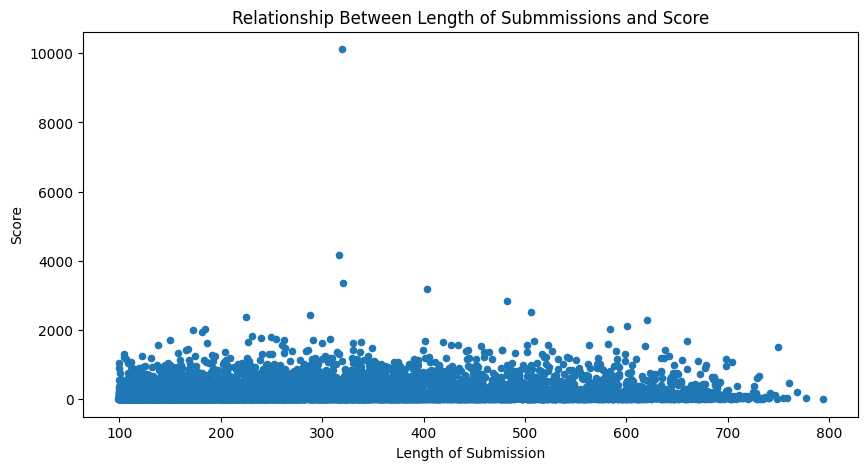

In [8]:
# Convert the selftext column to string and count the number of words in each selftext
submissions["word_count"] = submissions["selftext"].apply(lambda x: len(str(x).split()) if isinstance(x, (str, bytes)) else (len(str(int(x)).split()) if isinstance(x, (int, float)) else 0))

# Convert the word_count and score columns to numeric
submissions["word_count"] = pd.to_numeric(submissions["word_count"], errors="coerce")
submissions["score"] = pd.to_numeric(submissions["score"], errors="coerce")

# Create a scatter plot of the word count and score columns
submissions.plot(kind="scatter", x="word_count", y="score", figsize=(10, 5))

# Set plot title and axis labels
plt.title("Relationship Between Length of Submmissions and Score")
plt.xlabel("Length of Submission")
plt.ylabel("Score")

# Show the plot
plt.show()


### Drop all submissions less than 100 words long 

In [9]:
# create a function to count words in a string
def count_words(text):
    return len(text.split())

# apply the count_words function to the 'text' column
submissions['word_count'] = submissions['selftext'].apply(count_words)

# filter the DataFrame to remove rows where the 'word_count' column is less than 100
df_filtered = submissions[submissions['word_count'] >= 100]

# drop the 'word_count' column
df_filtered = df_filtered.drop('word_count', axis=1)

In [11]:
submissions = df_filtered

submissions

,id,title,selftext,author,score,num_comments,created_date
0,yc4bm,"No brain, No pain.",I swear that convergys will hire any moron tha...,[deleted],28,10,2012-08-16 19:38:03
1,yamv8,"""how fast does your modems go ?",Starting off the awesome Subreddit\n\nI used t...,[deleted],34,4,2012-08-16 01:24:57
2,ydntm,"[I can't tell you] information line, this is P...",Yay! 28th subscriber!\n\nI used to work for a...,PoglaTheGrate,29,4,2012-08-17 15:02:53
3,yicc4,Dishwasher blues,The stories i've heard amazes me but this one ...,[deleted],31,15,2012-08-20 05:05:34
4,ymjc0,"Tech support agent, and yet I can't touch my c...",At my work we are not allowed to adjust the mo...,hanzors,40,19,2012-08-22 06:27:29
...,...,...,...,...,...,...,...
10125,zxk7w2,"""Are you a camel jockey?"" Oh dear God",I just had a call that absolutely takes the ca...,CZJayG,277,41,2022-12-28 20:35:49
10126,zxn7bt,Call Totals Giving me Anxiety,Does anyone else have to make a certain amount...,BatBitch1016,45,7,2022-12-28 22:31:50
10127,zz7684,"kudos to you guys, I don't know how you do it.","I worked in retail for 7 years, recently took ...",Fact0ry0fSadness,211,54,2022-12-30 18:07:48
10128,zz8ztg,When will they learn?,(Work emergency roadside assistance as a dispa...,HogwartsAlumni25,30,11,2022-12-30 19:22:58


### Create histograms that show the distributions of submission length, number of comments, and score

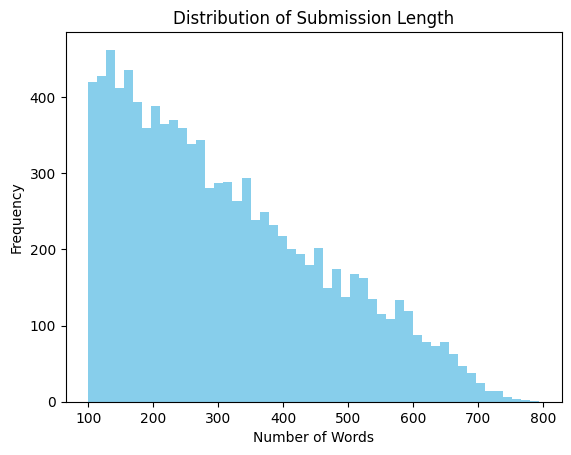

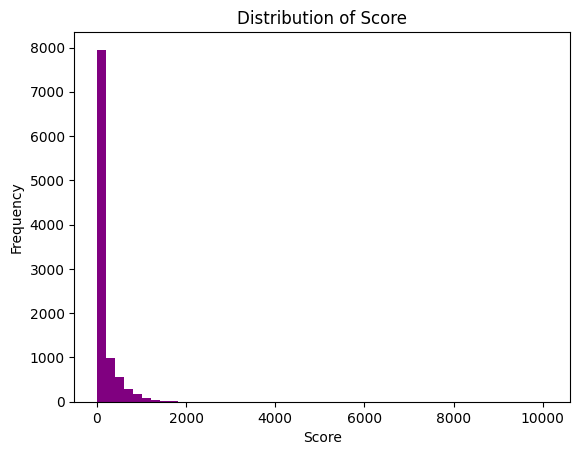

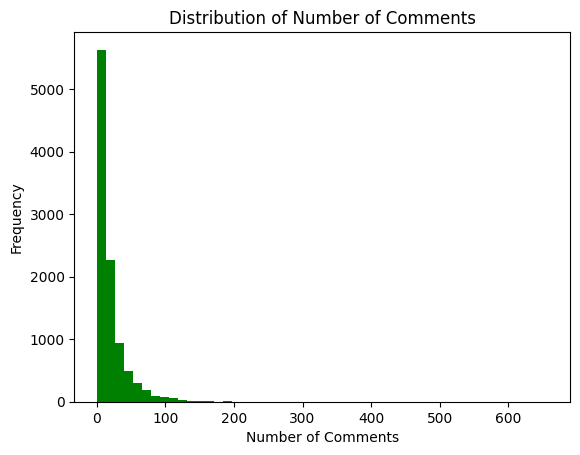

In [12]:
# Create a histogram of selftext length
submissions["selftext_length"] = submissions["selftext"].str.split().apply(len)
plt.hist(submissions["selftext_length"], bins=50, color="skyblue")
plt.title("Distribution of Submission Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Create a histogram of score
plt.hist(submissions["score"], bins=50, color="purple")
plt.title("Distribution of Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Create a histogram of num_comments
plt.hist(submissions["num_comments"], bins=50, color="green")
plt.title("Distribution of Number of Comments")
plt.xlabel("Number of Comments")
plt.ylabel("Frequency")
plt.show()

### Create visualization for comments

In [13]:
comments['body'] = comments['body'].astype(str)
comments['body'].dropna(inplace=True)
comments

,parent_id,body,score
0,t3_yc807,I'm not too familiar with mortgages but i thin...,8.0
1,t3_yc807,While I have no problem in the identification ...,4.0
2,t1_c5x5hyx,I never understood why we make people type in ...,3.0
3,t3_ymjc0,"this makes me like my call center, everything ...",3.0
4,t3_yc4bm,My boyfriend &amp; a few of our friends have w...,4.0
...,...,...,...
76843,t1_j2cqjfx,Or when theyve paid their bill late and we hav...,3.0
76844,t1_j2en3sz,I feel that. I love when claimants want a rent...,2.0
76845,t3_zzqwd8,"When I worked front desk for a hotel, someone ...",26.0
76846,t1_j2dej3k,I've done that but not to avoid calls. It was ...,7.0


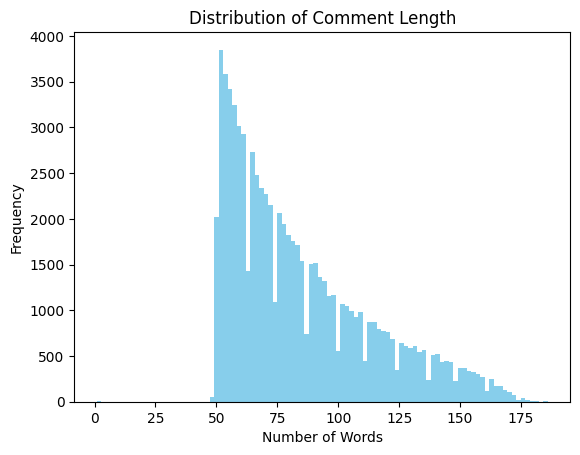

In [14]:
# Create a histogram of selftext length
comments["body"] = comments["body"].str.split().apply(len)
plt.hist(comments["body"], bins=100, color="skyblue")
plt.title("Distribution of Comment Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


### Keep comments as is for now, export filtered submissions to new CSVs for topic modeling, sentiment analysis, and summarization.

In [15]:
submissions.to_csv('tfcc_submissions_for_top_modeling.csv', index=False)
submissions.to_csv('tfcc_submissions_for_sentiment.csv', index=False)
submissions.to_csv('tfcc_submissions_for_summarization.csv', index=False)

